In [3]:
from movie_translation_data_creation_functions import *

import sys
sys.path.append('../exchange_dialogues')

from exchange_dialogues_functions import *

import skimage.transform

In [4]:
config = MovieTranslationConfig()

In [5]:
config.USING_DLIB_OR_FACE_ALIGNMENT

'dlib'

In [6]:
video_file = '/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/videos/telugu/Sharwanand/Sharwanand_0100.mp4'

In [6]:
using_dlib_or_face_alignment = 'dlib'
dlib_detector, dlib_predictor = load_dlib_detector_and_predictor()

In [7]:
crop_expanded_face_square=True
save_with_blackened_mouths_and_polygons=False
save_gif=False
save_landmarks_as_txt=False
save_landmarks_as_csv=False
verbose=True

In [8]:
video_file_split = video_file.split("/")
video_file_name = os.path.splitext(video_file_split[-1])[0]
actor = video_file_split[-2]
language = video_file_split[-3]
video_frames_dir = os.path.join(config.MOVIE_TRANSLATION_DATASET_DIR, "frames", language, actor, video_file_name)
print(video_frames_dir)

/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames/telugu/Sharwanand/Sharwanand_0100


In [9]:
video_frames = imageio.get_reader(video_file)

In [10]:
FRAME_NUMBER = 19
for frame_number, frame in tqdm.tqdm(enumerate(video_frames), total=len(video_frames)):
    if frame_number == FRAME_NUMBER:
        break

 31%|███▏      | 15/48 [00:00<00:00, 68.27it/s]


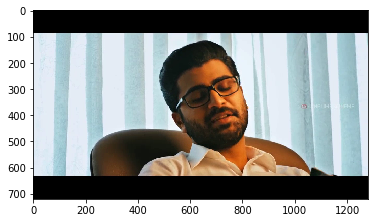

In [11]:
plt.imshow(frame)

In [12]:
video_frame_name = video_file_name + "_frame_{0:03d}.png".format(frame_number)

In [13]:
# landmarks = get_landmarks_using_dlib_detector_and_predictor(frame, dlib_detector, dlib_predictor)
landmarks = np.array([[553, 371],
       [566, 407],
       [580, 440],
       [596, 473],
       [621, 497],
       [652, 515],
       [690, 521],
       [730, 522],
       [764, 511],
       [789, 494],
       [802, 471],
       [817, 444],
       [823, 412],
       [820, 378],
       [812, 344],
       [801, 311],
       [788, 280],
       [578, 342],
       [586, 312],
       [609, 291],
       [639, 283],
       [665, 286],
       [682, 273],
       [700, 258],
       [722, 252],
       [744, 253],
       [758, 266],
       [689, 302],
       [697, 320],
       [707, 338],
       [716, 357],
       [691, 393],
       [706, 392],
       [722, 390],
       [733, 383],
       [742, 376],
       [611, 347],
       [622, 338],
       [636, 331],
       [653, 328],
       [642, 339],
       [628, 346],
       [714, 305],
       [724, 299],
       [737, 295],
       [750, 294],
       [742, 301],
       [729, 305],
       [689, 464],
       [704, 445],
       [718, 433],
       [729, 432],
       [739, 425],
       [750, 425],
       [764, 432],
       [759, 429],
       [753, 434],
       [742, 439],
       [731, 444],
       [714, 454],
       [697, 459],
       [722, 445],
       [733, 442],
       [744, 437],
       [755, 433],
       [746, 422],
       [735, 427],
       [725, 432]])

In [14]:
len(landmarks)

68

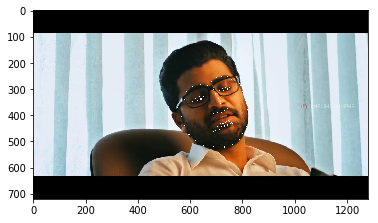

In [16]:
utils.plot_2D_landmarks(frame, landmarks)

In [17]:
frame_combined_2D = '/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames_combined/telugu/Sharwanand/Sharwanand_0100/Sharwanand_0100_frame_combined_001.png'
frame_combined_3D = '/shared/fusor/home/voleti.vikram/MOVIE_TRANSLATION/frames_combined/telugu/Sharwanand_3D/Sharwanand_0100/Sharwanand_0100_frame_combined_001.png'

In [18]:
a_2D = cv2.cvtColor(cv2.imread(frame_combined_2D), cv2.COLOR_BGR2RGB)
a_3D = cv2.cvtColor(cv2.imread(frame_combined_3D), cv2.COLOR_BGR2RGB)

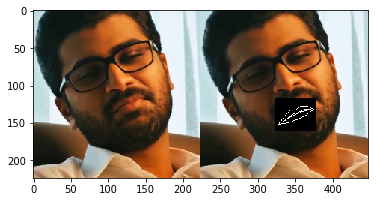

In [19]:
plt.imshow(a_2D)

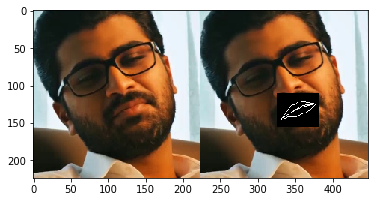

In [20]:
plt.imshow(a_3D)

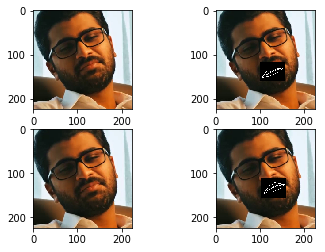

In [21]:
a_2D_1 = a_2D[:, :224, :]
a_2D_2 = a_2D[:, 224:, :]
a_3D_1 = a_3D[:, :224, :]
a_3D_2 = a_3D[:, 224:, :]
plt.subplot(221)
plt.imshow(a_2D_1)
plt.subplot(222)
plt.imshow(a_2D_2)
plt.subplot(223)
plt.imshow(a_3D_1)
plt.subplot(224)
plt.imshow(a_3D_2)

In [22]:
telugu_Sharwanand_2D_landmarks_100 = utils.read_landmarks('telugu', 'Sharwanand', 100, '2D_dlib')
telugu_Sharwanand_3D_landmarks_100 = utils.read_landmarks('telugu', 'Sharwanand', 100, '3D')

In [23]:
lm_2D = np.array(telugu_Sharwanand_2D_landmarks_100[1][1:])
lm_3D = np.array(telugu_Sharwanand_3D_landmarks_100[1][1:])

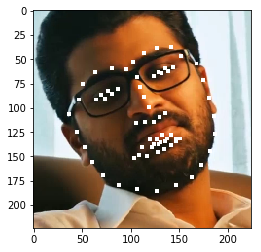

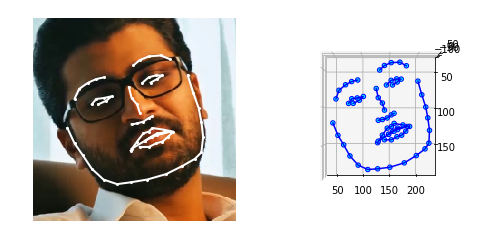

In [24]:
utils.plot_2D_landmarks(a_2D_1, lm_2D)
utils.plot_3D_landmarks(a_3D_1, lm_3D)

In [131]:
lm_2D[30], lm_3D[30]

(array([119, 100]), array([117, 104,  73]))

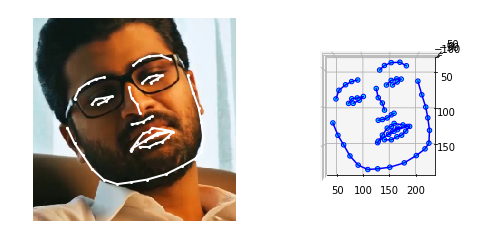

In [123]:
plot_3D_landmarks(a_2D_1, lm_3D)

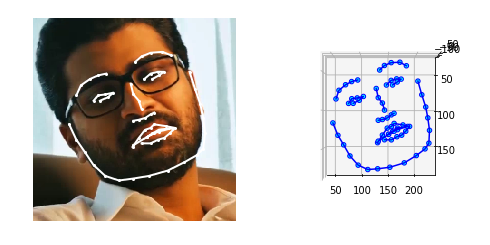

In [132]:
plot_3D_landmarks(a_2D_1, lm_3D + np.array([119-117, 100-104, 0]))